<a href="https://colab.research.google.com/github/limkaram/Natural_language_processing_with_deep_learning/blob/main/Term_Frequency_Inverse_Document_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TF-IDF(Term Frequency-Inverse Document Frequency)
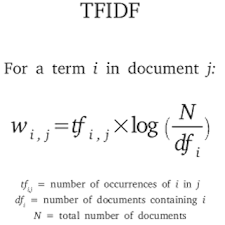

1. 직접 TF-IDF 구현하기

In [ ]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = []
for doc in docs:
    for word in doc.split():
        vocab.append(word)
vocab = list(set(vocab))
vocab.sort()
print(vocab)

In [ ]:
N = len(docs)  # 전체 문서의 수

def tf(term, doc):
    return doc.count(term)

def idf(term):
    df = 0
    for doc in docs:
        df += term in doc
    idf = log(N / (1 + df))
    return idf

def tf_idf(term, doc):
    return tf(term, doc) * idf(term)

In [ ]:
# tf 구하기
result = []
for i in range(N):
    result.append([])
    doc = docs[i]
    for j in range(len(vocab)):
        term = vocab[j]
        result[i].append(tf(term, doc))
tf_ = pd.DataFrame(result, columns=vocab)
tf_

In [ ]:
# idf 구하기
result = []
for j in range(len(vocab)):
    term = vocab[j]
    result.append(idf(term))
idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

In [ ]:
# tf-idf matrix 구하기
result = []
for i in range(N):
    result.append([])
    doc = docs[i]
    for j in range(len(vocab)):
        term = vocab[j]
        result[i].append(tf_idf(term, doc))
tfidf_ = pd.DataFrame(result, columns=[vocab])
tfidf_

2. 사이킷런 활용 DTM와 TF-IDF 구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# DTM 구현
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
# TF-IDF 구현
tfidf_vector = TfidfVectorizer().fit(corpus)
print(tfidf_vector.transform(corpus).toarray())
print(tfidf_vector.vocabulary_)